In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score,roc_curve

# Read The Data

In [2]:
data = pd.read_csv("Brain_GSE50161.csv")

In [3]:
data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


# Convert Data Into Dataframe

In [4]:
# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Defining Features and feature selection

In [5]:
#Defining X and y 
X = df.drop(['samples','type'], axis=1)
y = df['type']

In [6]:
# Perform feature selection using SelectKBest and f_classif
k_best = SelectKBest(score_func=f_classif, k=3)  # Select top 3 features
X_selected = k_best.fit_transform(X, y)

In [7]:
# Get the selected feature indices
selected_indices = k_best.get_support(indices=True)

In [8]:
# Get the names of selected features
selected_features = X.columns[selected_indices]

# plotting a graph for features

Selected Features:
Index(['212993_at', '220156_at', '240065_at'], dtype='object')


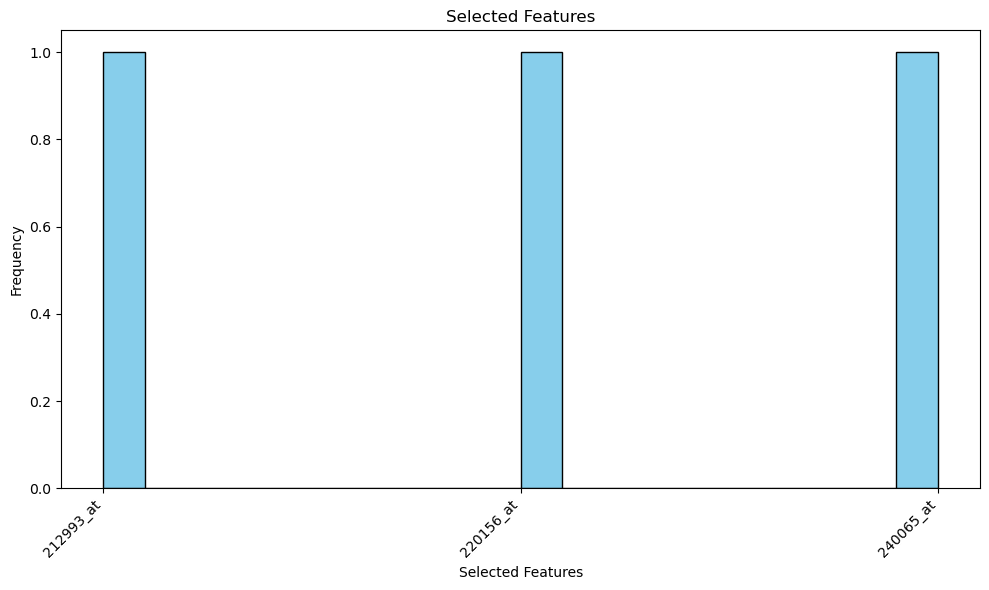

In [9]:
print("Selected Features:")
print(selected_features)
plt.figure(figsize=(10, 6))
plt.hist(selected_features, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Selected Features')
plt.ylabel('Frequency')
plt.title('Selected Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Defining a fuction for important features in Random Forest

In [10]:
from pandas.plotting import scatter_matrix
def plot_important_features(model, limiter, dataset, classes):
    indexes = np.where(model.feature_importances_ >= np.max(model.feature_importances_) / limiter)
    features = dataset.columns[indexes[0]]
    importances = np.array(model.feature_importances_[indexes[0]])
    inds = importances.argsort()
    features = features[inds][-10:]
    importances = importances[inds][-10:]
    print("Features                  Importances", end="\n\n")
    for feature, importance in zip(features, importances):
        print(feature, "       ", importance)
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.bar(features, importances)
    ax.set_ylabel('Importance')
    ax.set_xlabel('Features')
    plt.tight_layout()
    plt.show()
    
    # Plotting Bar Plot for Every Important Feature
    df = dataset[features].copy()
    df.hist(figsize=(10, 20))

    # Plotting Correlation Graphs for Every Important Feature and Label
    scatter_matrix(df, figsize=(10, 20))
    

# PCA

In [11]:
# Perform feature selection or dimensionality reduction (e.g., PCA)
pca = PCA(n_components=20)  # Choose number of principal components
X_reduced = pca.fit_transform(X)

# Sampling the Data

In [12]:
# Perform stratified sampling based on 'type' column
stratified_sampled_data = df.groupby('type', group_keys=False).apply(lambda x: x.sample(frac=0.3, random_state=42))

# Displaying the Sampled Data

In [13]:
# Display the sampled data
print("Stratified Sampled Data:")
print(stratified_sampled_data.head())

Stratified Sampled Data:
    samples        type  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
39      873  ependymoma  12.416188  9.079116  8.335810  8.801703   3.853589   
25      859  ependymoma  12.680754  8.311863  7.571993  9.741334   4.345053   
26      860  ependymoma  12.965147  8.438010  7.058539  9.401396   4.307017   
44      878  ependymoma  12.645764  8.406188  7.321294  8.133787   4.253772   
35      869  ependymoma  12.506887  8.855623  8.773573  8.574727   4.131700   

     1294_at   1316_at   1320_at  ...  AFFX-r2-Ec-bioD-3_at  \
39  8.381885  7.290335  6.093295  ...             12.893369   
25  7.682722  6.936778  7.185547  ...             11.919846   
26  7.983527  7.241787  6.485690  ...             12.053796   
44  8.648658  6.408554  6.044084  ...             13.056726   
35  7.666310  7.545845  5.972713  ...             12.262060   

    AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
39             12.434424            14.141570      

# Counting the frequencies in type

In [14]:
# Count the frequency of each cancer type in the 'type' column
cancer_type_counts = df['type'].value_counts()
print(cancer_type_counts)

type
ependymoma               46
glioblastoma             34
medulloblastoma          22
pilocytic_astrocytoma    15
normal                   13
Name: count, dtype: int64


# Heat Map to see the distribution in Data

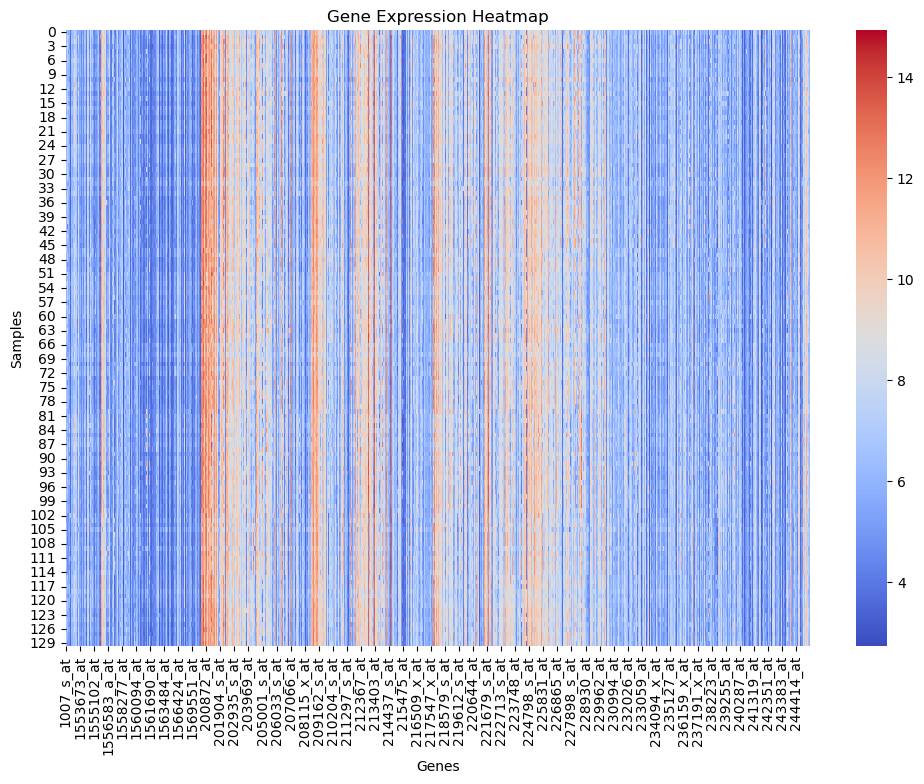

In [15]:
expression_data = data.drop(columns=['samples', 'type'])
plt.figure(figsize=(12, 8))
sns.heatmap(expression_data, cmap='coolwarm', cbar=True)
plt.title('Gene Expression Heatmap')
plt.xlabel('Genes')
plt.ylabel('Samples')
plt.show()

# Plotting Bar Graph

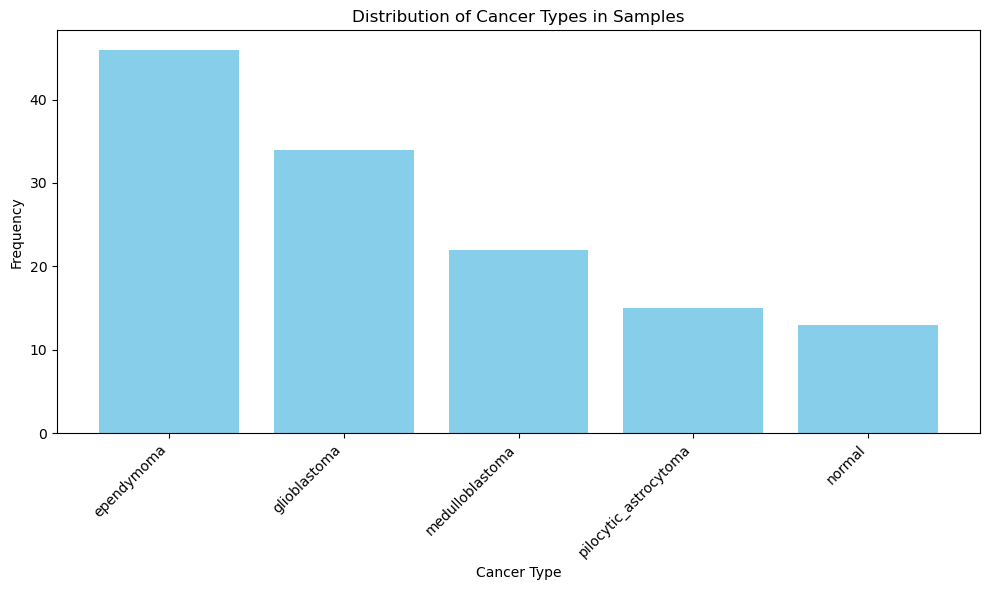

In [16]:
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
plt.bar(cancer_type_counts.index, cancer_type_counts.values, color='skyblue')  # Create a bar plot
plt.title('Distribution of Cancer Types in Samples')  # Set the plot title
plt.xlabel('Cancer Type')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

# Handling the missing values

In [17]:
# Use the isnull() function to identify missing values
missing_values = df.isnull().sum()

# Filter out columns with missing values
missing_values = missing_values[missing_values== 0]

# Print the missing values
print("Missing Values:")
print(missing_values)

Missing Values:
samples            0
type               0
1007_s_at          0
1053_at            0
117_at             0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54677, dtype: int64


In [18]:
# Drop any rows with missing values
df.dropna(inplace=True)

# Encoding the data with Label Encoder

In [19]:
df# Create a LabelEncoder object
label_encoder = LabelEncoder()

In [20]:
df['type'] = label_encoder.fit_transform(df['type'])

# Plot for Three random genes

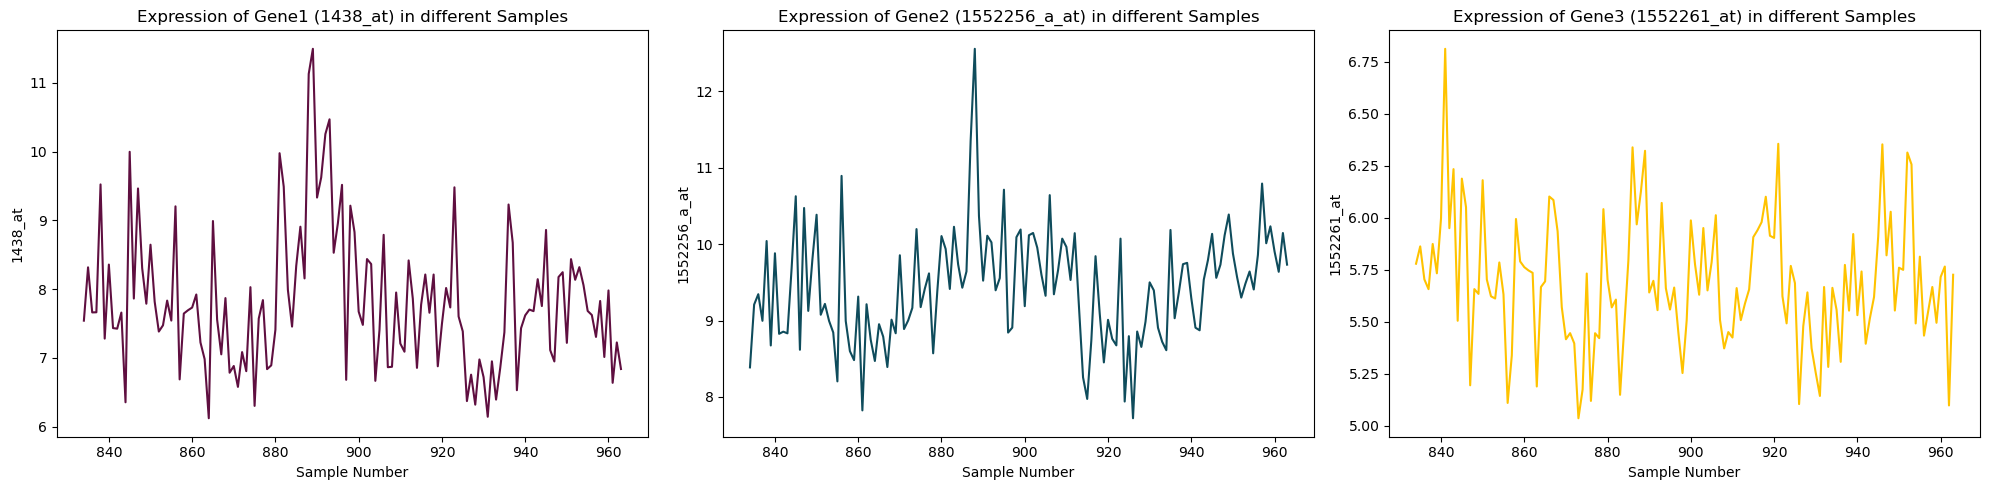

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot for Gene1 (1438_at)
sns.lineplot(x='samples', y='1438_at', data=data, color="#5f0f40", ax=axes[0])
axes[0].set_title("Expression of Gene1 (1438_at) in different Samples")
axes[0].set_xlabel("Sample Number")

# Plot for Gene2 (1552256_a_at)
sns.lineplot(x='samples', y='1552256_a_at', data=data, color="#0f4c5c", ax=axes[1])
axes[1].set_title("Expression of Gene2 (1552256_a_at) in different Samples")
axes[1].set_xlabel("Sample Number")

# Plot for Gene3 (1552261_at)
sns.lineplot(x='samples', y='1552261_at', data=data, color="#FFC300", ax=axes[2])
axes[2].set_title("Expression of Gene3 (1552261_at) in different Samples")
axes[2].set_xlabel("Sample Number")

plt.tight_layout()
plt.show()

In [22]:
Normal_samples = data.loc[data["type"]=="normal"]
Ependymoma = data.loc[data["type"]=="ependymoma"]
Glioblastoma = data.loc[data["type"]=="glioblastoma"]
medulloblastoma = data.loc[data["type"]=="medulloblastoma"]
pilocytic_astrocytoma = data.loc[data["type"]=="pilocytic_astrocytoma"]

# Representing the Expression of gene in Samples

Text(0.5, 0, 'Sample Number')

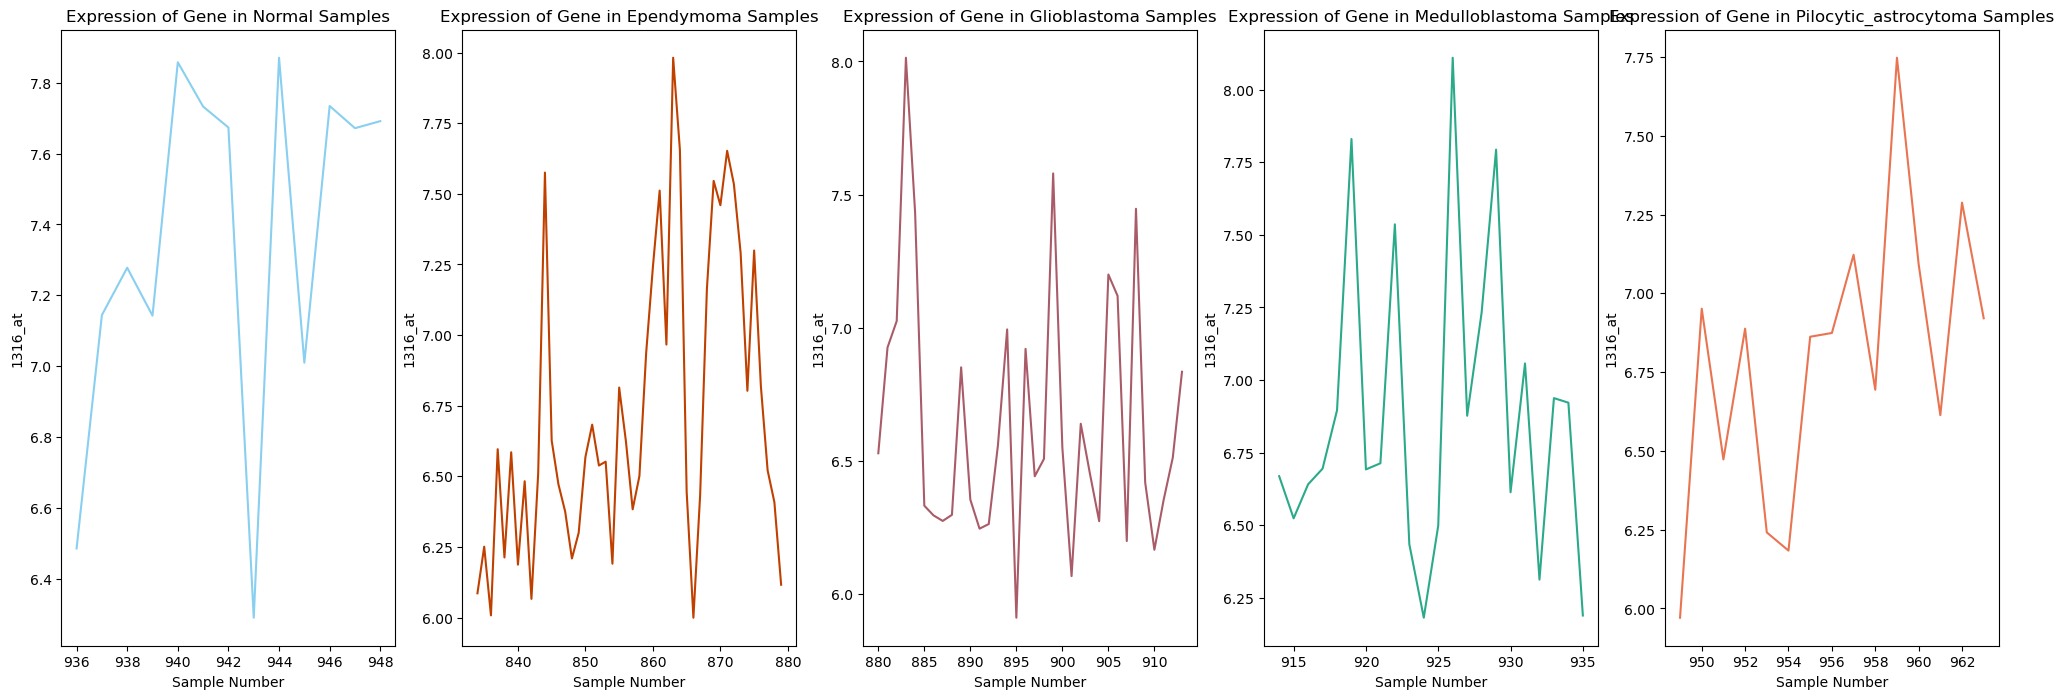

In [23]:
fig, axes = plt.subplots(1,5,figsize=(25,8))

sns.lineplot(x=Normal_samples.samples,y="1316_at",data=Normal_samples,color="#89CFF0",ax=axes[0])
axes[0].set_title("Expression of Gene in Normal Samples")
axes[0].set_xlabel("Sample Number")

sns.lineplot(x=Ependymoma.samples,y="1316_at",data=Ependymoma,color="#C04000",ax=axes[1])
axes[1].set_title("Expression of Gene in Ependymoma Samples")
axes[1].set_xlabel("Sample Number")

sns.lineplot(x=Glioblastoma.samples,y="1316_at",data=Glioblastoma,color="#A95C68",ax=axes[2])
axes[2].set_title("Expression of Gene in Glioblastoma Samples")
axes[2].set_xlabel("Sample Number")

sns.lineplot(x=medulloblastoma.samples,y="1316_at",data=medulloblastoma,color="#2AAA8A",ax=axes[3])
axes[3].set_title("Expression of Gene in Medulloblastoma Samples")
axes[3].set_xlabel("Sample Number")

sns.lineplot(x=pilocytic_astrocytoma.samples,y="1316_at",data=pilocytic_astrocytoma,color="#E97451",ax=axes[4])
axes[4].set_title("Expression of Gene in Pilocytic_astrocytoma Samples")
axes[4].set_xlabel("Sample Number")

In [24]:
kind_of_cancer = df['type'].value_counts().to_frame()
kind_of_cancer

,count
type,
0,46
1,34
2,22
4,15
3,13


# Types of Cancer 

Text(0.5, 1.0, 'Kinds of Brain Cancers')

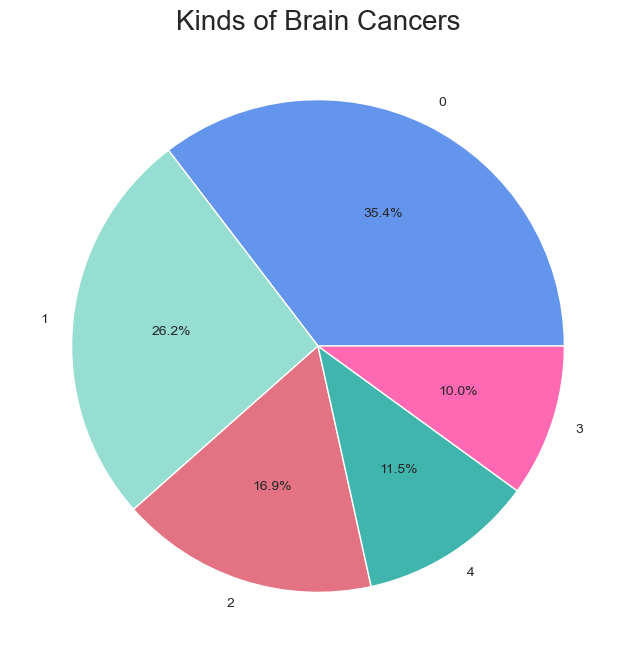

In [25]:
colors = ['#6495ED','#96DED1','#E37383','#40B5AD','#FF69B4']
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,8)
plt.pie(kind_of_cancer['count'],labels=kind_of_cancer.index,autopct='%1.1f%%',colors=colors)
plt.title("Kinds of Brain Cancers",fontsize=20)

In [26]:
# Apply t-SNE for dimensionality reduction (2D)
tsne = TSNE(n_components=2,perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualization of Gene Expression Data

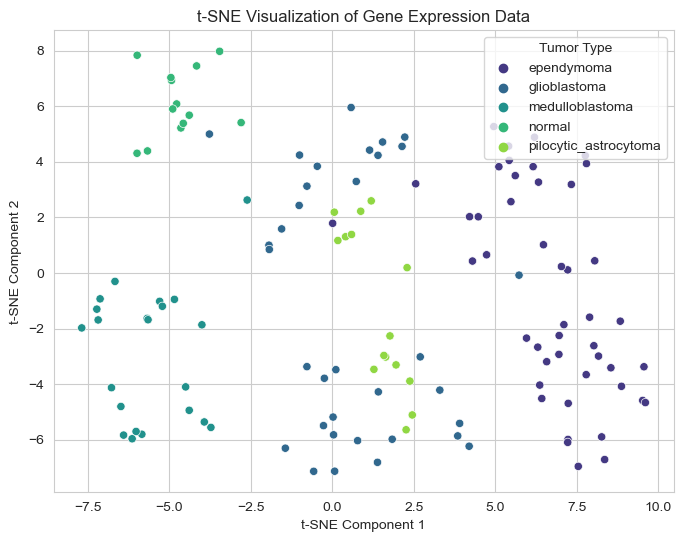

In [27]:
# Visualize t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis')
plt.title('t-SNE Visualization of Gene Expression Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Tumor Type', loc='best')
plt.show()

In [28]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest classifier

In [30]:
# Define the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Defining Grid Parameter for Optimizing the data (Hypermeter Tuning)

In [31]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required at each leaf node
}

In [32]:
# Perform Grid Search CV for Random Forest
grid_search_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=4, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [33]:
# Get the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_


In [34]:
# Evaluate the best Random Forest model on the scaled test set
y_pred_rf = best_rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Accuracy Result

In [35]:
print(f"Random Forest - Best Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest - Best Parameters: {grid_search_rf.best_params_}")

Random Forest - Best Accuracy: 0.92
Random Forest - Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# Classification Report

In [37]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
                       precision    recall  f1-score   support

           ependymoma       1.00      0.91      0.95        11
         glioblastoma       0.67      1.00      0.80         4
      medulloblastoma       1.00      1.00      1.00         7
               normal       1.00      1.00      1.00         1
pilocytic_astrocytoma       1.00      0.67      0.80         3

             accuracy                           0.92        26
            macro avg       0.93      0.92      0.91        26
         weighted avg       0.95      0.92      0.93        26



# Confusion matrix for visualising the metrics

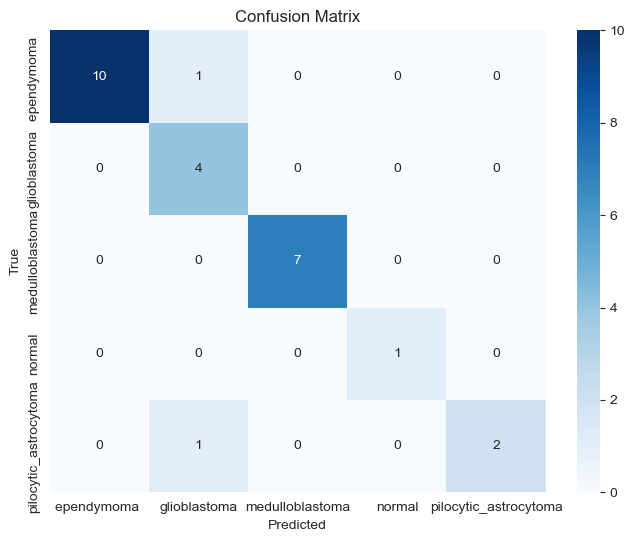

In [75]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_names = ['ependymoma ', 'glioblastoma', 'medulloblastoma', 'normal', 'pilocytic_astrocytoma']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Important feautures for Random Forest classifier 

Features                  Importances

218471_s_at         0.006013210266761718
1554141_s_at         0.006096034866001421
230093_at         0.006264697855340486
211471_s_at         0.006438387398764702
204469_at         0.00660444591609092
1555082_a_at         0.007165796488858599
230033_at         0.011476256695521093


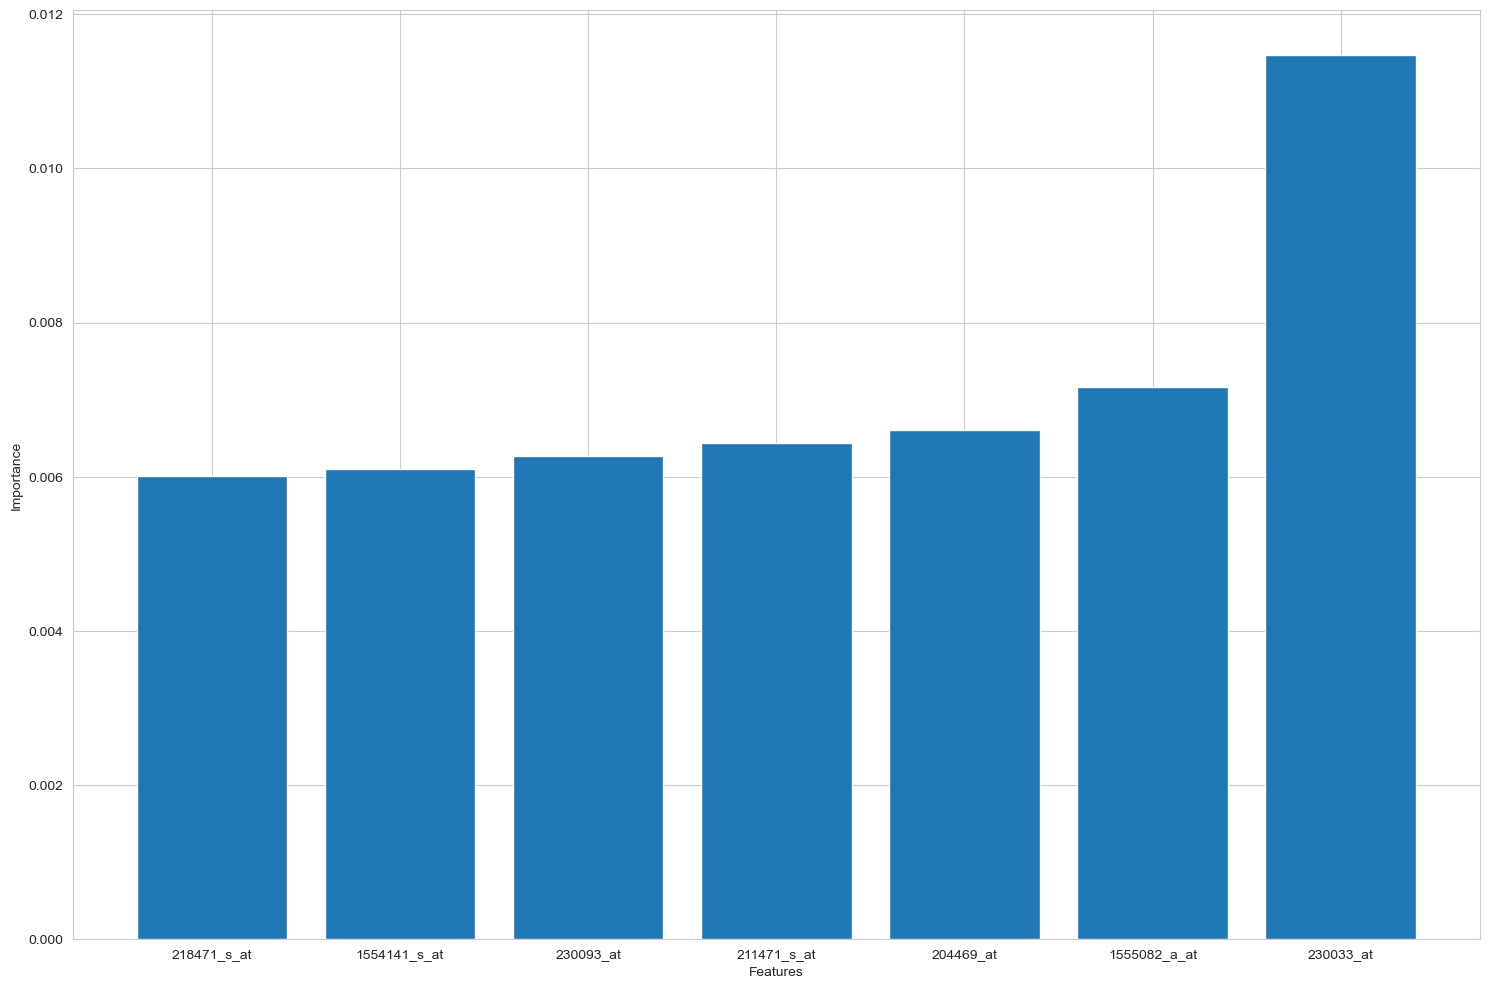

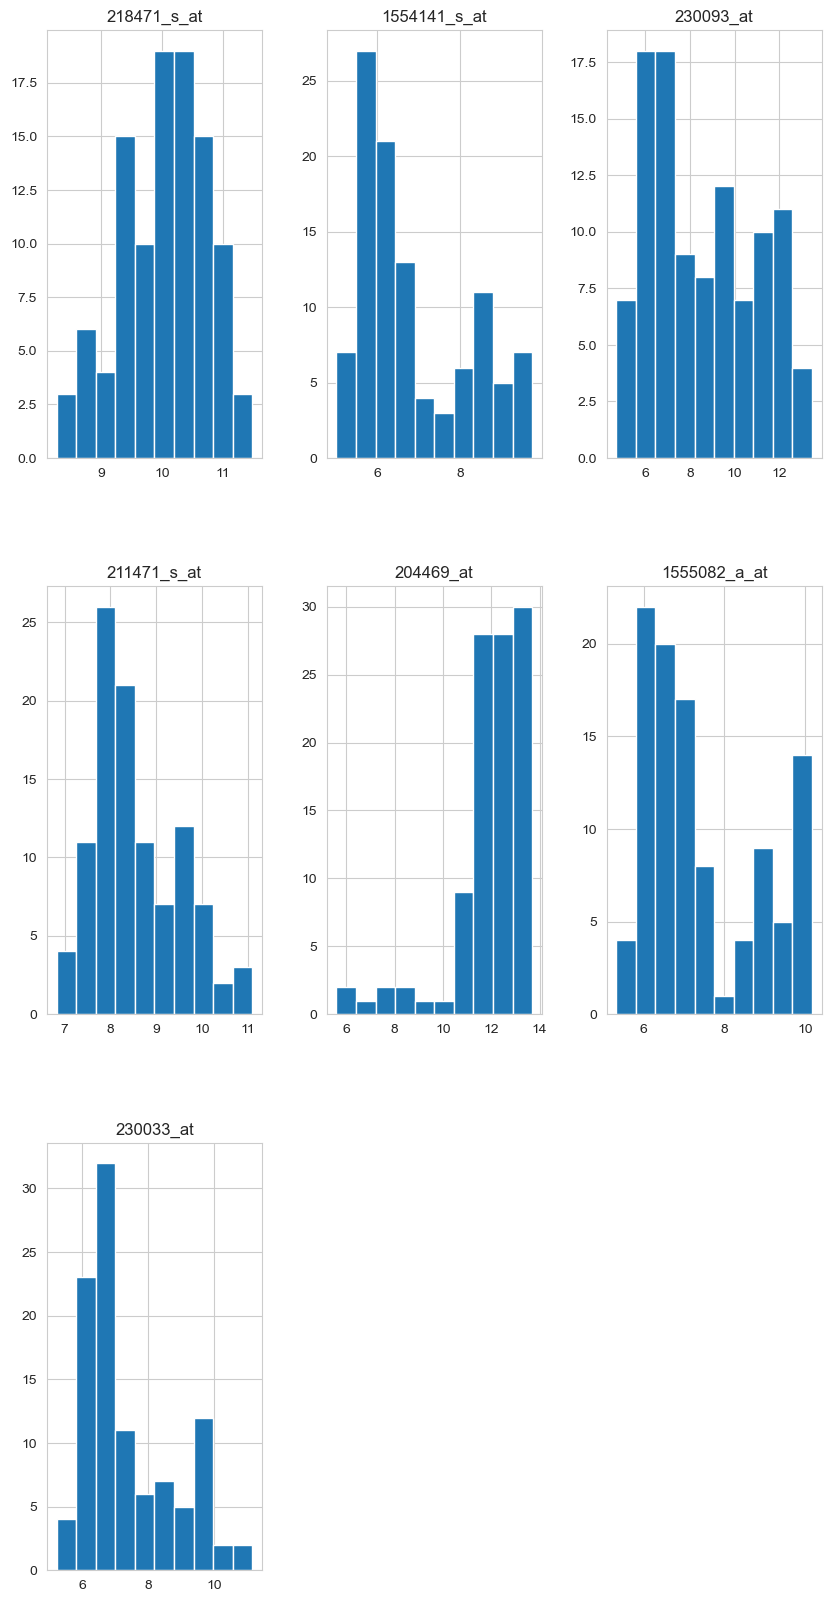

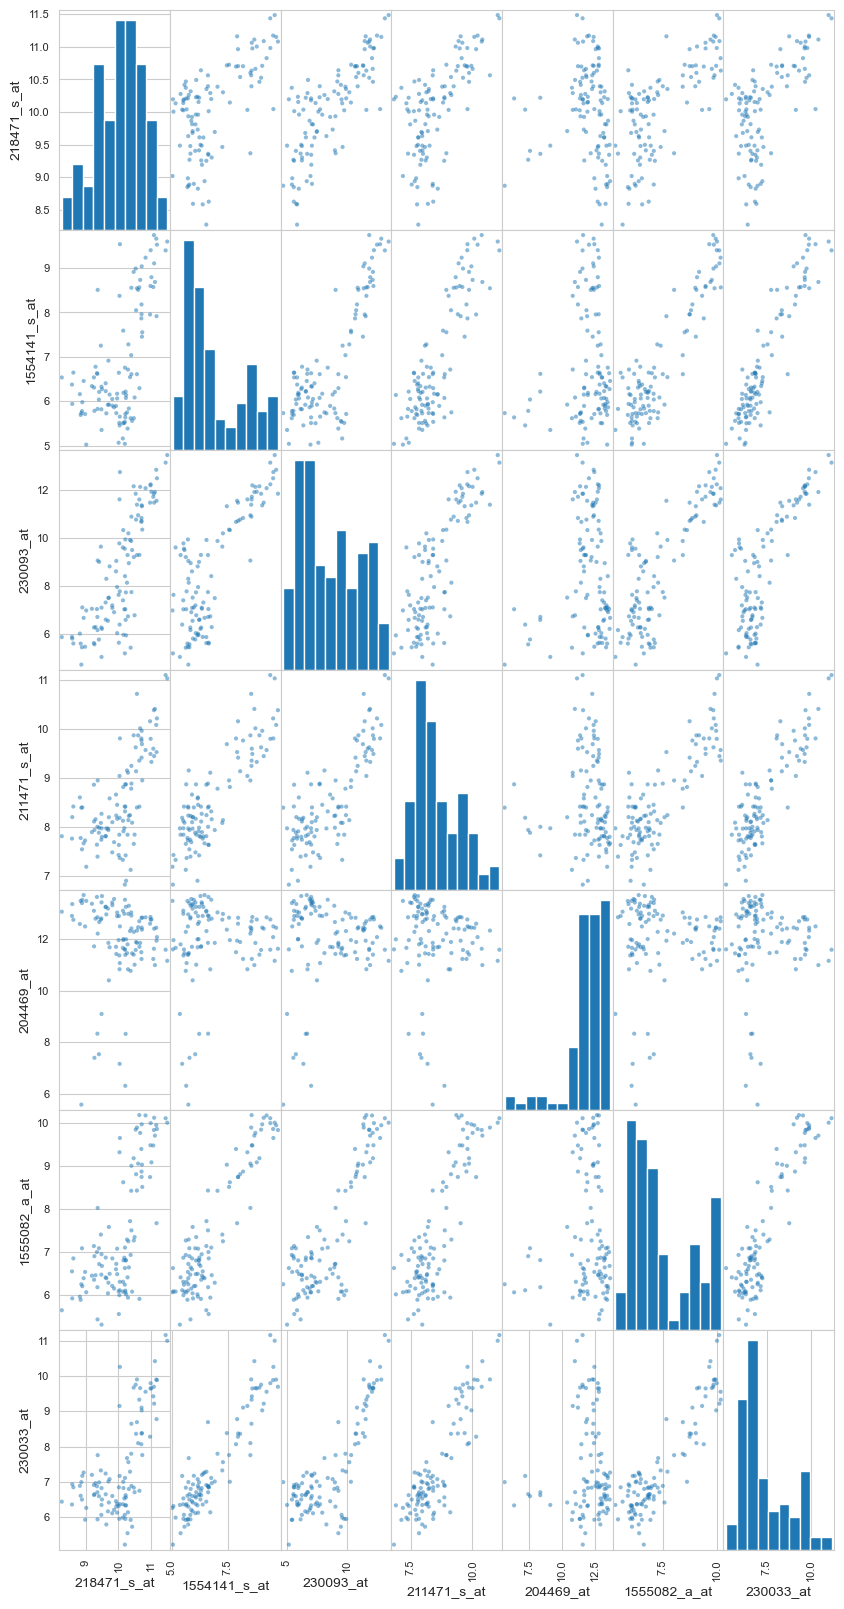

In [38]:
plot_important_features(grid_search_rf.best_estimator_, 2, X_train,y_train)

# SVM classifier

In [39]:
# Define the SVM classifier
svm = SVC(random_state=42)


# Grid Parameter for SVM

In [40]:
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],                # Regularization parameter
    'gamma': ['scale', 'auto'],       # Kernel coefficient
    'kernel': ['linear', 'rbf']       # Kernel type
}

In [41]:
# Perform Grid Search CV for SVM
grid_search_svm = GridSearchCV(svm, param_grid=param_grid_svm, cv=4, scoring='accuracy')
grid_search_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=4, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [42]:
# Get the best SVM model
best_svm_model = grid_search_svm.best_estimator_

In [43]:
# Evaluate the best SVM model on the scaled test set
y_pred_svm = best_svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [44]:
print(f"SVM - Best Accuracy: {accuracy_svm:.2f}")
print(f"SVM - Best Parameters: {grid_search_svm.best_params_}")

SVM - Best Accuracy: 0.92
SVM - Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [45]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Classification Report:
                       precision    recall  f1-score   support

           ependymoma       1.00      0.91      0.95        11
         glioblastoma       0.67      1.00      0.80         4
      medulloblastoma       1.00      1.00      1.00         7
               normal       1.00      1.00      1.00         1
pilocytic_astrocytoma       1.00      0.67      0.80         3

             accuracy                           0.92        26
            macro avg       0.93      0.92      0.91        26
         weighted avg       0.95      0.92      0.93        26



# confusion matrix for SVM

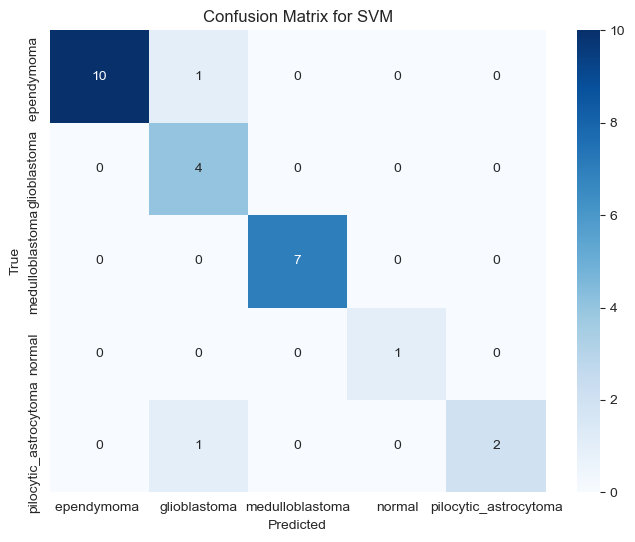

In [80]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_names = ['ependymoma ', 'glioblastoma', 'medulloblastoma', 'normal', 'pilocytic_astrocytoma']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.show()

# Logistic Regression classifier

In [47]:
# Define Logistic Regression classifier
logreg = LogisticRegression(random_state=42,max_iter=1000)

In [48]:
# Define parameter grid for hyperparameter tuning
param_grid_logreg = {
        'penalty': ['l2'],
        'C': [0.1, 1.0, 10.0]
    } 

In [49]:
# Perform Grid Search CV for LogReg
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, cv=4, scoring='accuracy')
grid_search_logreg.fit(X_train_scaled, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 1.0, 10.0], 'penalty': ['l2']},
             scoring='accuracy')

In [50]:
# Get the best  model
best_logreg_model = grid_search_logreg.best_estimator_

In [51]:
# Evaluate the best SVM model on the scaled test set
y_pred_logreg = best_logreg_model.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

In [52]:
print(f"LogReg - Best Accuracy: {accuracy_logreg:.2f}")
print(f"LogReg - Best Parameters: {grid_search_logreg.best_params_}")

LogReg - Best Accuracy: 0.96
LogReg - Best Parameters: {'C': 10.0, 'penalty': 'l2'}


In [53]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))


Classification Report:
                       precision    recall  f1-score   support

           ependymoma       0.92      1.00      0.96        11
         glioblastoma       1.00      1.00      1.00         4
      medulloblastoma       1.00      1.00      1.00         7
               normal       1.00      1.00      1.00         1
pilocytic_astrocytoma       1.00      0.67      0.80         3

             accuracy                           0.96        26
            macro avg       0.98      0.93      0.95        26
         weighted avg       0.96      0.96      0.96        26



# ROC curve for LR and RF

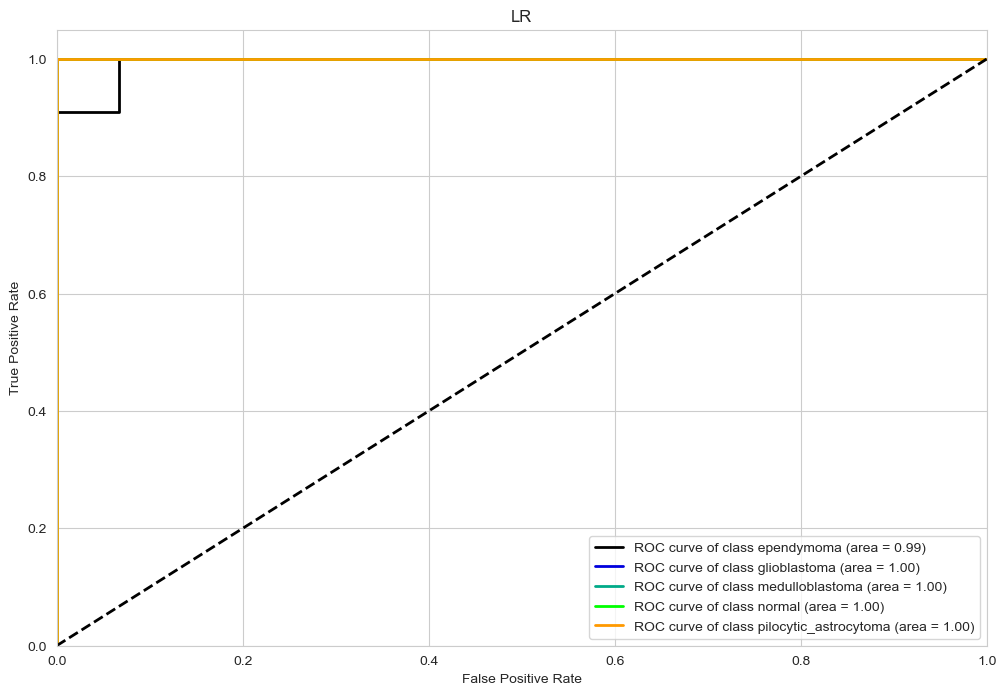

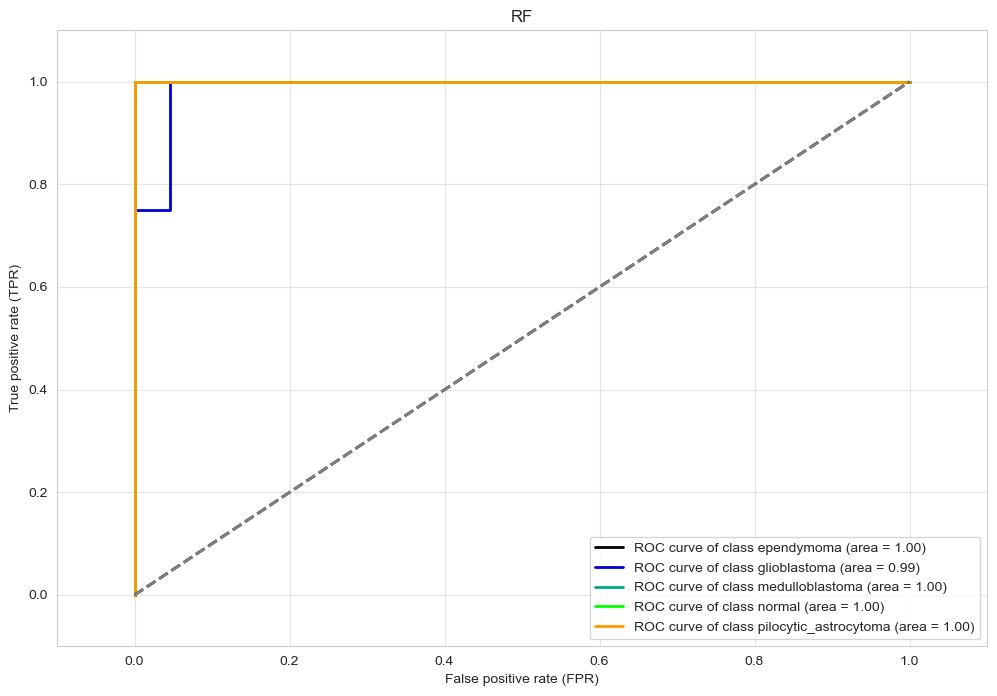

In [64]:
all_clf=[logreg,rf]
clf_labels=["LR", "RF"]
colors =["black", "orange",]
linestyles = [":","--"]
for clf, label,clr,ls in zip(all_clf, clf_labels, colors, linestyles):
  y_proba= clf.fit(X_train,y_train).predict_proba(X_test)
  skplt.metrics.plot_roc(y_test, y_proba, plot_micro=False, plot_macro=False,title=label)
    
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--',color='gray',linewidth=2)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()

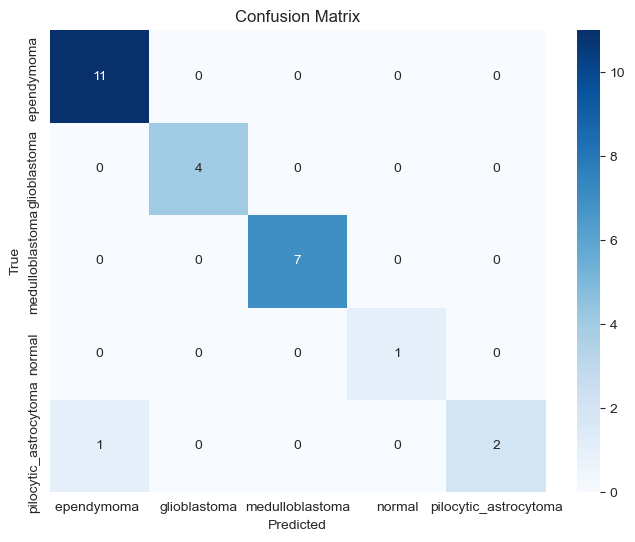

In [76]:
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
class_names = ['ependymoma ', 'glioblastoma', 'medulloblastoma', 'normal', 'pilocytic_astrocytoma']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# KN classifier

In [54]:
# Define KN classifier
KN = KNeighborsClassifier()

In [55]:
# Define parameter grid for K Nearest Neighbour
param_grid_logreg = {
        'n_neighbors': [4, 6, 8],
        'weights': ['uniform', 'distance']
}

In [56]:
# Perform Grid Search CV for KN
grid_search_KN = GridSearchCV(KN, param_grid=param_grid_logreg, cv=4, scoring='accuracy')
grid_search_KN.fit(X_train_scaled, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 6, 8],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [57]:
# Get the best  model
best_KN_model = grid_search_KN.best_estimator_

In [58]:
# Evaluate the best SVM model on the scaled test set
y_pred_KN = best_KN_model.predict(X_test_scaled)
accuracy_KN = accuracy_score(y_test, y_pred_KN)

In [59]:
print(f"K Nearest Neighbour - Best Accuracy: {accuracy_KN:.2f}")
print(f"K Nearest Neighbour - Best Parameters: {grid_search_KN.best_params_}")

K Nearest Neighbour - Best Accuracy: 0.88
K Nearest Neighbour - Best Parameters: {'n_neighbors': 4, 'weights': 'distance'}


In [60]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_KN))


Classification Report:
                       precision    recall  f1-score   support

           ependymoma       0.85      1.00      0.92        11
         glioblastoma       1.00      0.50      0.67         4
      medulloblastoma       1.00      1.00      1.00         7
               normal       1.00      1.00      1.00         1
pilocytic_astrocytoma       0.67      0.67      0.67         3

             accuracy                           0.88        26
            macro avg       0.90      0.83      0.85        26
         weighted avg       0.90      0.88      0.88        26



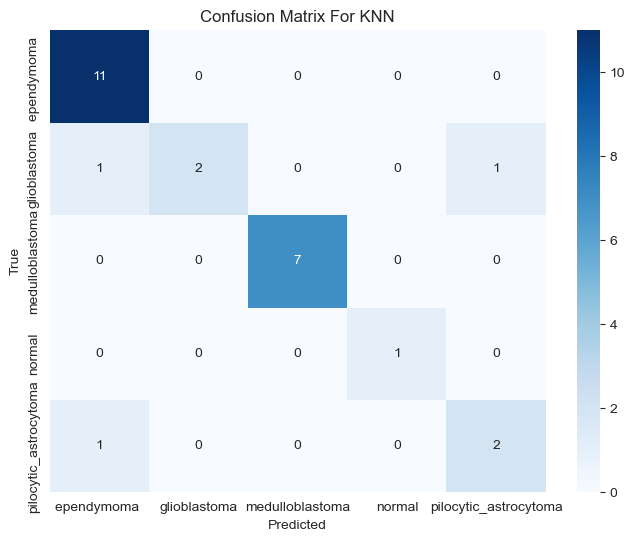

In [81]:
conf_matrix = confusion_matrix(y_test, y_pred_KN)
class_names = ['ependymoma ', 'glioblastoma', 'medulloblastoma', 'normal', 'pilocytic_astrocytoma']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix For KNN')
plt.show()

# Best of All Classifiers

# Summary table for the best peroforming model with metrics

In [62]:
# Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')  
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')  
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')  

# Logistic Regression
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_precision = precision_score(y_test, y_pred_logreg, average='weighted')  
logreg_recall = recall_score(y_test, y_pred_logreg, average='weighted')  
logreg_f1 = f1_score(y_test, y_pred_logreg, average='weighted')  

# KNN
knn_accuracy = accuracy_score(y_test, y_pred_KN)
knn_precision = precision_score(y_test, y_pred_KN, average='weighted')  
knn_recall = recall_score(y_test, y_pred_KN, average='weighted')  
knn_f1 = f1_score(y_test, y_pred_KN, average='weighted')  

# SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')  
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')  
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')  

# Create a summary table
summary_table = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'KNN', 'SVM'],
    'Accuracy': [rf_accuracy, logreg_accuracy, knn_accuracy, svm_accuracy],
    'Precision': [rf_precision, logreg_precision, knn_precision, svm_precision],
    'Recall': [rf_recall, logreg_recall, knn_recall, svm_recall],
    'F1 Score': [rf_f1, logreg_f1, knn_f1, svm_f1]
})

print(summary_table)


                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.923077   0.948718  0.923077  0.926007
1  Logistic Regression  0.961538   0.964744  0.961538  0.958528
2                  KNN  0.884615   0.896450  0.884615  0.875000
3                  SVM  0.923077   0.948718  0.923077  0.926007


# Accuracy for the best model (Logistic Regression)

In [63]:
accuracy_scores = {
    'Logistic Regression': accuracy_logreg,
    'Random Forest':accuracy_rf ,
    'Support Vector Machine':accuracy_svm,
    'K-Nearest Neighbors':accuracy_KN
}

# Find the classifier with the highest accuracy
best_classifier = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_classifier]

print("Classifier with the Best Accuracy:", best_classifier)
print("Best Accuracy Score:", best_accuracy)


Classifier with the Best Accuracy: Logistic Regression
Best Accuracy Score: 0.9615384615384616
